In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1. Missing Completely At Random (MCAR)
- No systematic meaning to that variable and other variables

In [4]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


### 2. Missing Not At Random (MNAR)
- Some relationship between data missing and other variables

In [6]:
df['cabin_null'] = np.where(df['Cabin'].isnull(), 1, 0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [7]:
df['cabin_null'].mean()

0.7710437710437711

##### Summary: 77% null values present in cabin feature

In [11]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

`Summary` : we can see that out of the persons not survived(0), 87% of data are missing which is quite convincible because data can be missed because there are not available to give data

`Note` : so this feature comes under MNAR

### 3. Missing At Random(MAR)
`Eg: Men- hiding their salary` & `Women- hide their age`


## 4. IMPUTATION TECHNIQUES

### 4.1 Mean-Median Imputation

`Mean-Median imputation` used only when the data completely missed at random `(MCAR)`

In [13]:
df = df[['Age', 'Fare', 'Survived']]
df.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [14]:
df.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [15]:
median_age = df['Age'].median()
median_age

28.0

In [17]:
df['Age_median'] = df['Age'].fillna(value=median_age)
df.head()

/var/folders/14/v6n289_j38zblcgwvg271f1w0000gn/T/ipykernel_1325/3130585121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_median'] = df['Age'].fillna(value=median_age)


,Age,Fare,Survived,Age_median
0,22.0,7.2500,0,22.0
1,38.0,71.2833,1,38.0
2,26.0,7.9250,1,26.0
3,35.0,53.1000,1,35.0
4,35.0,8.0500,0,35.0


In [18]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


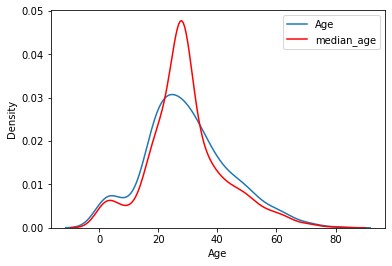

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(df['Age'], label='Age')
sns.kdeplot(df['Age_median'], color='red', label='median_age')
plt.legend()

### 4.2 Random Imputation technique
`Random Imputation technique` is used on MCAR

In [38]:
df[df['Age'].isnull()]

,Age,Fare,Survived,Age_median
5,NaN,8.4583,0,28.0
17,NaN,13.0000,1,28.0
19,NaN,7.2250,1,28.0
26,NaN,7.2250,0,28.0
28,NaN,7.8792,1,28.0
...,...,...,...,...
859,NaN,7.2292,0,28.0
863,NaN,69.5500,0,28.0
868,NaN,9.5000,0,28.0
878,NaN,7.8958,0,28.0


`Note` : Totally 177 rows are missing. We take 177 rows which is not missing and 

In [40]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64